First draft of comparative allele analysis between DK0911 and Pst_104E

In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import os
import shutil

import math
import subprocess
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import collections
import itertools as it
import scipy.stats as stats
import matplotlib
import ptitprince as pt

In [3]:
OUT_PATH = '/home/benjamin/genome_assembly/Warrior/allele_analysis/v04/post_analysis/'
DK0911_fh = '/home/benjamin/genome_assembly/Warrior/allele_analysis/v04/post_analysis/DK_0911_v04_analysed_alleles.df'
Pst_104E_v12_fh = '/home/benjamin/genome_assembly/PST79/FALCON/p_assemblies/v9_1/Pst_104E_v12/Warrior_comp_runs/allele_analysis/post_allele_analysis/Pst_104E_v12_analysed_alleles.df'

In [4]:
Pst_104E_df = pd.read_csv(Pst_104E_v12_fh, sep='\t')
DK0911_df = pd.read_csv(DK0911_fh, sep='\t')

/home/benjamin/anaconda3/envs/rainpy/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3018: DtypeWarning: Columns (19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
DK0911_df.columns

Index(['Unnamed: 0', 'Query', 'Target', 'PctID', 'AlnLgth', 'NumMis', 'NumGap',
       'StartQuery', 'StopQuery', 'StartTarget', 'StopTarget', 'e-value',
       'BitScore', 'QLgth', 'QCov', 'TLgth', 'TCov', 'q_contig', 't_contig',
       'q_contig == t_contig', 't_contig == h_contig_overlap', 'allele_source',
       'matchType', 'aQuery', 'aTarget', 'comp', 'aQuery_LT', 'aTarget_LT',
       'Index', 'protein_hamming', 'protein_levenshtein', 'cds_hamming',
       'cds_levenshtein', 'yn00_dN/dS', 'LWL85_dN/dS', 'LWL85m_dN/dS',
       'LPB93_dN/dS', 'unphased_aQuery', 'PO_single_aQuery',
       'PO_single_aTarget', 'PO_interhaplotype_paralogs'],
      dtype='object')

In [6]:
DK0911_df.allele_source.unique()

array(['BLAST', 'PO', 'h_rBLAST', nan], dtype=object)

In [7]:
DK0911_df.drop('Unnamed: 0', axis=1, inplace=True)

In [8]:
Pst_104E_df.drop('Unnamed: 0', axis=1, inplace=True)

In [9]:
allele_filter = ()

In [10]:
DK0911_alleles_df = DK0911_df[DK0911_df.allele_source.astype(str).str.contains('PO')]

/home/benjamin/anaconda3/envs/rainpy/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


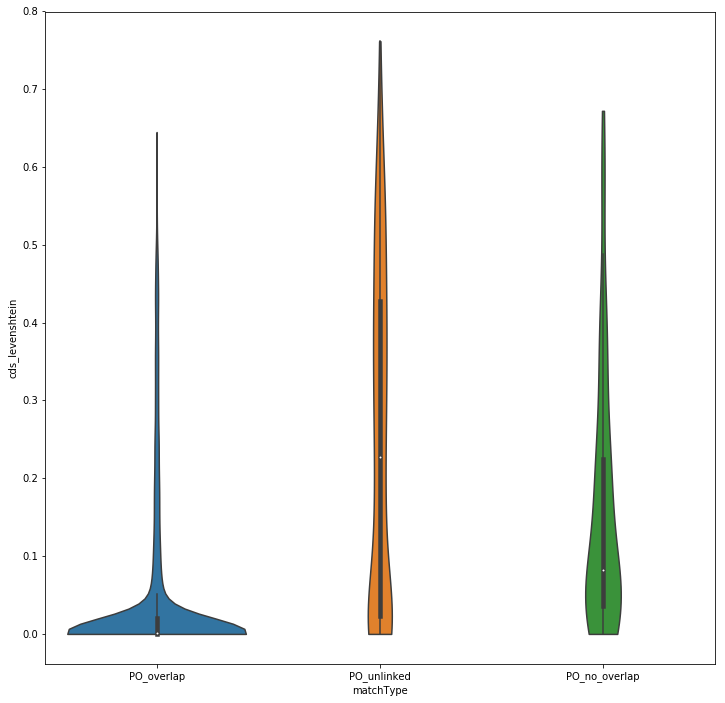

In [11]:
plt.figure(figsize=(12,12))
sns.violinplot(y='cds_levenshtein', x='matchType', data=DK0911_alleles_df, cut=0)

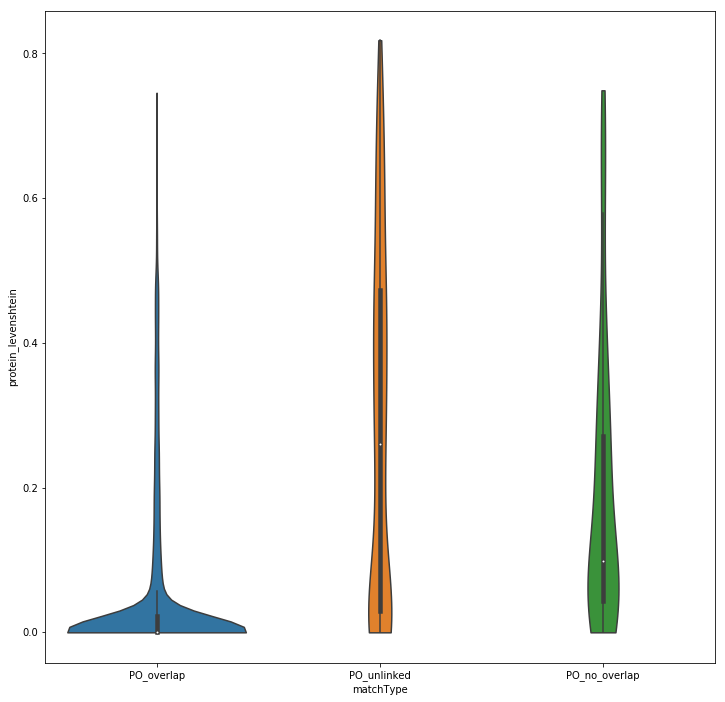

In [12]:
plt.figure(figsize=(12,12))
sns.violinplot(y='protein_levenshtein', x='matchType', data=DK0911_alleles_df, cut=0)

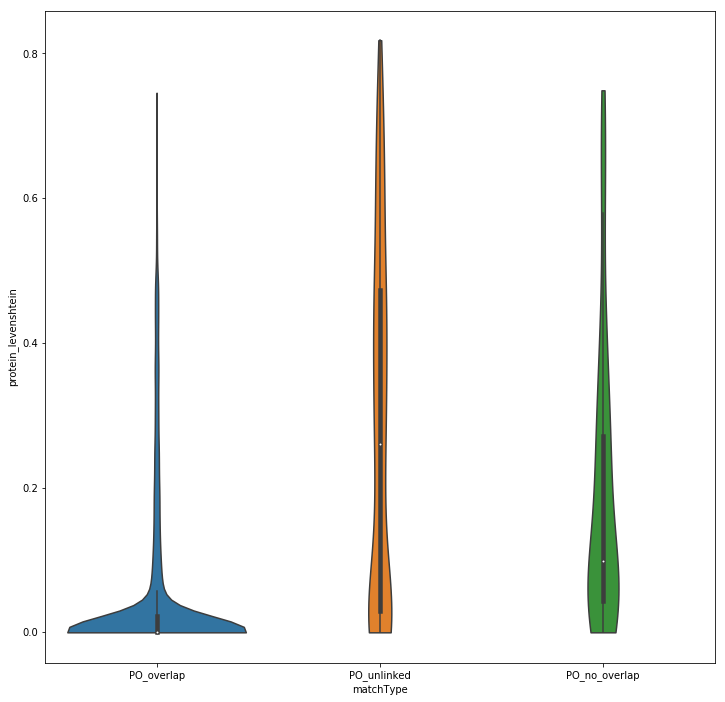

In [13]:
plt.figure(figsize=(12,12))
sns.violinplot(y='protein_levenshtein', x='matchType', data=DK0911_alleles_df, cut=0)

In [14]:
DK0911_allele_summary = DK0911_alleles_df.loc[:, [ 'protein_levenshtein', 
       'cds_levenshtein', 'yn00_dN/dS', 'LWL85_dN/dS' ]].describe().round(3)

In [15]:
DK0911_allele_summary

,protein_levenshtein,cds_levenshtein,yn00_dN/dS,LWL85_dN/dS
count,8142.000,8142.000,3473.000,3483.000
mean,0.066,0.059,0.507,0.657
std,0.138,0.125,0.655,4.563
min,0.000,0.000,-0.000,0.000
25%,0.000,0.000,0.082,0.077
50%,0.002,0.002,0.400,0.291
75%,0.040,0.034,0.725,0.640
max,0.818,0.761,13.620,149.000


In [16]:
Pst_104E_df_alleles_df = Pst_104E_df[Pst_104E_df.allele_source.astype(str).str.contains('PO')]

In [17]:
Pst_104E__allele_summary = Pst_104E_df_alleles_df.loc[:, [ 'protein_levenshtein', 
       'cds_levenshtein', 'yn00_dN/dS', 'LWL85_dN/dS' ]].describe().round(3)

In [18]:
Pst_104E__allele_summary 

,protein_levenshtein,cds_levenshtein,yn00_dN/dS,LWL85_dN/dS
count,11007.000,11007.000,6944.000,6973.000
mean,0.058,0.053,0.408,0.456
std,0.119,0.109,0.514,3.469
min,0.000,0.000,-0.000,0.000
25%,0.000,0.001,0.069,0.064
50%,0.007,0.007,0.260,0.210
75%,0.041,0.035,0.581,0.475
max,0.806,0.733,10.429,166.000


In [19]:
DK0911_allele_summary['protein_identity'] = (1 - DK0911_allele_summary.protein_levenshtein) * 100
DK0911_allele_summary['cds_identity'] = (1 - DK0911_allele_summary.cds_levenshtein) * 100
Pst_104E__allele_summary ['protein_identity'] = (1 - Pst_104E__allele_summary.protein_levenshtein) * 100
Pst_104E__allele_summary ['cds_identity'] = (1 - Pst_104E__allele_summary.cds_levenshtein) * 100

In [20]:
Pst_104E_df_alleles_df.loc[Pst_104E_df_alleles_df[Pst_104E_df_alleles_df.matchType == 'PO_no_overlap'].index, 'matchType'] = 'Local rearrangement'

/home/benjamin/anaconda3/envs/rainpy/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [21]:
Pst_104E_df_alleles_df.loc[(Pst_104E_df_alleles_df.matchType == 'PO_overlap'),'matchType'] = "Classic"

In [22]:
Pst_104E_df_alleles_df.loc[(Pst_104E_df_alleles_df.matchType == 'PO_unlinked'),'matchType'] = "Unlinked"

In [101]:
Pst_104E_df_alleles_df.groupby('matchType')['protein_levenshtein', 
       'cds_levenshtein', 'yn00_dN/dS', 'LWL85_dN/dS' ].describe().round(3).\
T.loc[:,["Classic", "Local rearrangement", 'Unlinked']]

matchType                   Classic  Local rearrangement  Unlinked
protein_levenshtein count  9818.000              455.000   734.000
                    mean      0.045                0.117     0.197
                    std       0.097                0.144     0.222
                    min       0.000                0.000     0.000
                    25%       0.000                0.019     0.007
                    50%       0.005                0.050     0.111
                    75%       0.029                0.156     0.345
                    max       0.718                0.636     0.806
cds_levenshtein     count  9818.000              455.000   734.000
                    mean      0.042                0.104     0.169
                    std       0.092                0.130     0.194
                    min       0.000                0.003     0.000
                    25%       0.000                0.023     0.004
                    50%       0.005                0.039     0.087
                    75%       0.027                0.136     0.306
                    max       0.644                0.608     0.733
yn00_dN/dS          count  5939.000              448.000   557.000
                    mean      0.388                0.444     0.594
                    std       0.485                0.623     0.662
                    min      -0.000               -0.000    -0.000
                    25%       0.058                0.114     0.212
                    50%       0.236                0.314     0.480
                    75%       0.548                0.585     0.783
                    max       6.360                7.301    10.429
LWL85_dN/dS         count  5988.000              449.000   536.000
                    mean      0.438                0.695     0.456
                    std       3.068                7.827     0.400
                    min       0.000                0.000     0.000
                    25%       0.055                0.102     0.193
                    50%       0.190                0.252     0.374
                    75%       0.448                0.471     0.606
                    max     126.000              166.000     4.242

In [24]:
DK0911_alleles_df.loc[DK0911_alleles_df[DK0911_alleles_df.matchType == 'PO_no_overlap'].index, 'matchType'] = 'Local rearrangement'
DK0911_alleles_df.loc[DK0911_alleles_df[DK0911_alleles_df.matchType == 'PO_unlinked'].index, 'matchType'] = "Unlinked"
DK0911_alleles_df.loc[DK0911_alleles_df[DK0911_alleles_df.matchType == 'PO_overlap'].index, 'matchType'] = "Classic"


In [102]:
DK0911_alleles_df.groupby('matchType')['protein_levenshtein', 
       'cds_levenshtein', 'yn00_dN/dS', 'LWL85_dN/dS' ].describe().round(3).\
T.loc[:,["Classic", "Local rearrangement", 'Unlinked']]

matchType                   Classic  Local rearrangement  Unlinked
protein_levenshtein count  7565.000               97.000   480.000
                    mean      0.050                0.193     0.281
                    std       0.112                0.197     0.246
                    min       0.000                0.000     0.000
                    25%       0.000                0.043     0.030
                    50%       0.001                0.099     0.260
                    75%       0.023                0.271     0.472
                    max       0.746                0.749     0.818
cds_levenshtein     count  7565.000               97.000   480.000
                    mean      0.046                0.158     0.247
                    std       0.105                0.162     0.216
                    min       0.000                0.000     0.000
                    25%       0.000                0.036     0.023
                    50%       0.001                0.082     0.227
                    75%       0.021                0.225     0.427
                    max       0.645                0.672     0.761
yn00_dN/dS          count  2997.000               94.000   382.000
                    mean      0.493                0.657     0.582
                    std       0.642                0.929     0.668
                    min      -0.000               -0.000    -0.000
                    25%       0.048                0.271     0.215
                    50%       0.392                0.429     0.428
                    75%       0.720                0.692     0.758
                    max      13.620                6.635     9.024
LWL85_dN/dS         count  3028.000               94.000   361.000
                    mean      0.643                0.481     0.822
                    std       4.591                0.546     4.904
                    min       0.000                0.026     0.000
                    25%       0.054                0.216     0.207
                    50%       0.286                0.350     0.369
                    75%       0.643                0.552     0.638
                    max     149.000                4.057    81.667

In [103]:
def ranksumtest(df1, df2, matchType, to_test):
    return stats.ranksums\
    (df1.loc[df1.matchType == matchType, to_test],df2.loc[df2.matchType == matchType, to_test] )

In [105]:
ranksumtest(DK0911_alleles_df, Pst_104E_df_alleles_df, 'Classic', 'protein_levenshtein')

RanksumsResult(statistic=-15.57065819304386, pvalue=1.1521550893099653e-54)

In [106]:
ranksumtest(DK0911_alleles_df, Pst_104E_df_alleles_df, 'Classic', 'cds_levenshtein')

RanksumsResult(statistic=-20.10924388619904, pvalue=6.125036827610814e-90)

In [111]:
ranksumtest(DK0911_alleles_df, Pst_104E_df_alleles_df, 'Unlinked', 'protein_levenshtein')

RanksumsResult(statistic=6.0476630877193465, pvalue=1.4696187424831132e-09)

In [109]:
ranksumtest(DK0911_alleles_df, Pst_104E_df_alleles_df, 'Unlinked', 'cds_levenshtein')

RanksumsResult(statistic=6.1884718986929474, pvalue=6.075023476140072e-10)

In [110]:
ranksumtest(DK0911_alleles_df, Pst_104E_df_alleles_df, 'Local rearrangement', 'cds_levenshtein')

RanksumsResult(statistic=4.000997308544263, pvalue=6.30760753909743e-05)

In [108]:
ranksumtest(DK0911_alleles_df, Pst_104E_df_alleles_df, 'Local rearrangement', 'protein_levenshtein')

RanksumsResult(statistic=4.4101424066051775, pvalue=1.0330266239890078e-05)

In [32]:
DK0911_allele_summary

,protein_levenshtein,cds_levenshtein,yn00_dN/dS,LWL85_dN/dS,protein_identity,cds_identity
count,8142.000,8142.000,3473.000,3483.000,-814100.0,-814100.0
mean,0.066,0.059,0.507,0.657,93.4,94.1
std,0.138,0.125,0.655,4.563,86.2,87.5
min,0.000,0.000,-0.000,0.000,100.0,100.0
25%,0.000,0.000,0.082,0.077,100.0,100.0
50%,0.002,0.002,0.400,0.291,99.8,99.8
75%,0.040,0.034,0.725,0.640,96.0,96.6
max,0.818,0.761,13.620,149.000,18.2,23.9


In [33]:
Pst_104E__allele_summary

,protein_levenshtein,cds_levenshtein,yn00_dN/dS,LWL85_dN/dS,protein_identity,cds_identity
count,11007.000,11007.000,6944.000,6973.000,-1100600.0,-1100600.0
mean,0.058,0.053,0.408,0.456,94.2,94.7
std,0.119,0.109,0.514,3.469,88.1,89.1
min,0.000,0.000,-0.000,0.000,100.0,100.0
25%,0.000,0.001,0.069,0.064,100.0,99.9
50%,0.007,0.007,0.260,0.210,99.3,99.3
75%,0.041,0.035,0.581,0.475,95.9,96.5
max,0.806,0.733,10.429,166.000,19.4,26.7


In [112]:
Merged_df = pd.concat([DK0911_alleles_df, Pst_104E_df_alleles_df], axis=0).reset_index(drop=True)

In [113]:
def strain(Query_LT):
    if 'DK0911' in Query_LT:
        return 'DK0911'
    elif 'Pst104E' in Query_LT:
        return 'Pst104E'

In [114]:
Merged_df['strain'] = Merged_df.aQuery_LT.apply(strain)

/home/benjamin/anaconda3/envs/rainpy/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


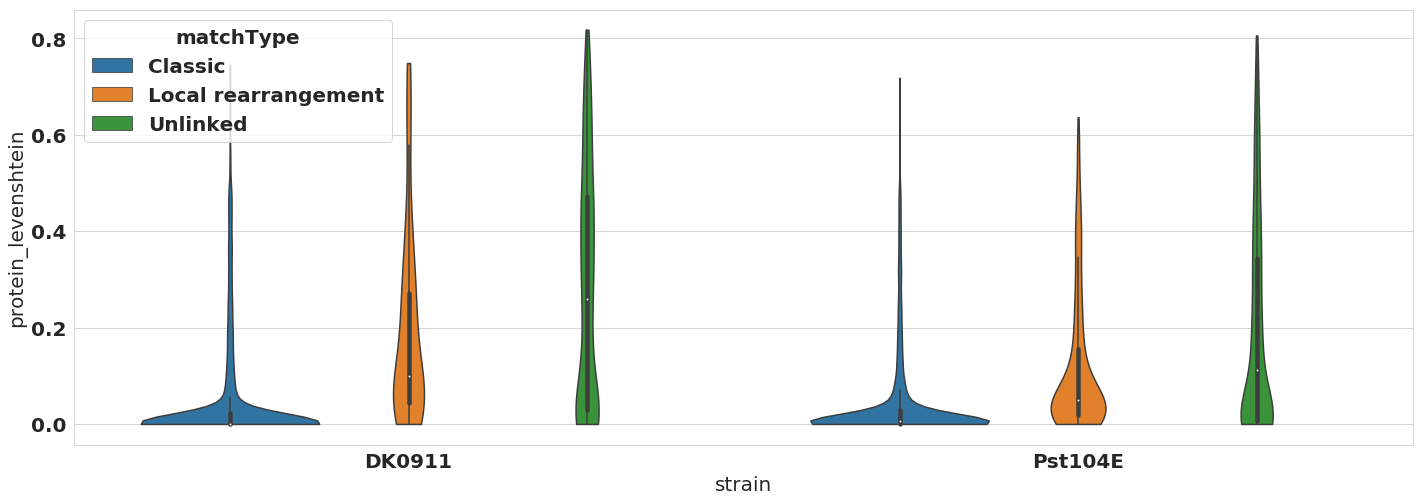

In [116]:
plt.figure(figsize=(24,8))
sns.violinplot(x='strain', y='protein_levenshtein', data=Merged_df, hue='matchType', \
               hue_order=["Classic", "Local rearrangement", 'Unlinked' ] ,cut=0)

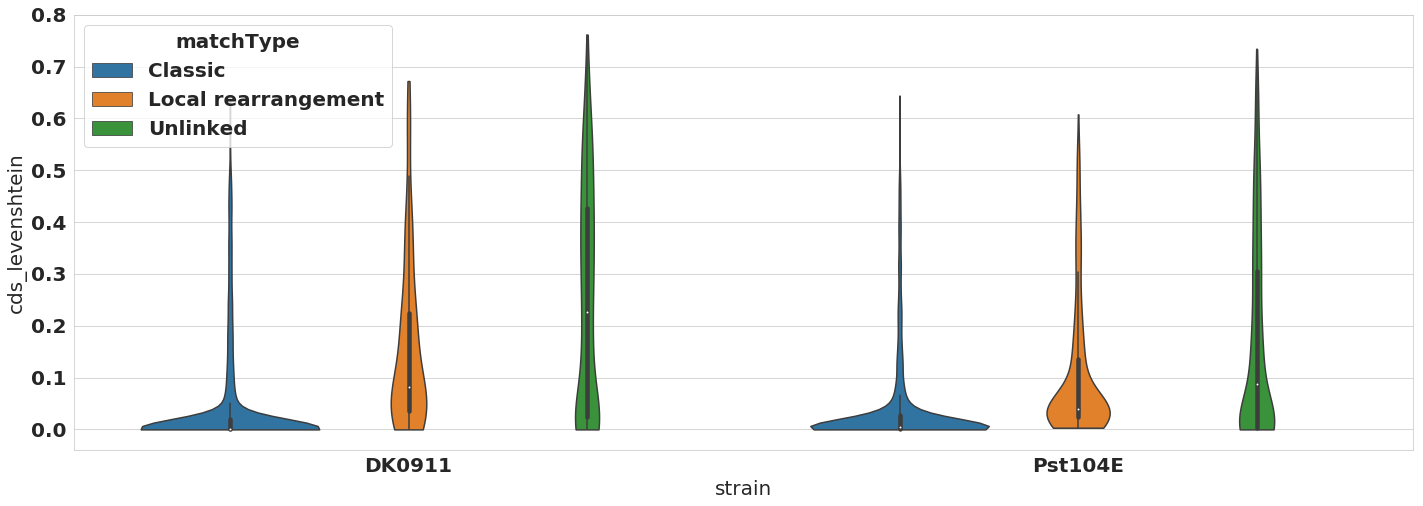

In [117]:
plt.figure(figsize=(24,8))
sns.violinplot(x='strain', y='cds_levenshtein', data=Merged_df, hue='matchType', \
               hue_order=["Classic", "Local rearrangement", 'Unlinked' ] ,cut=0)

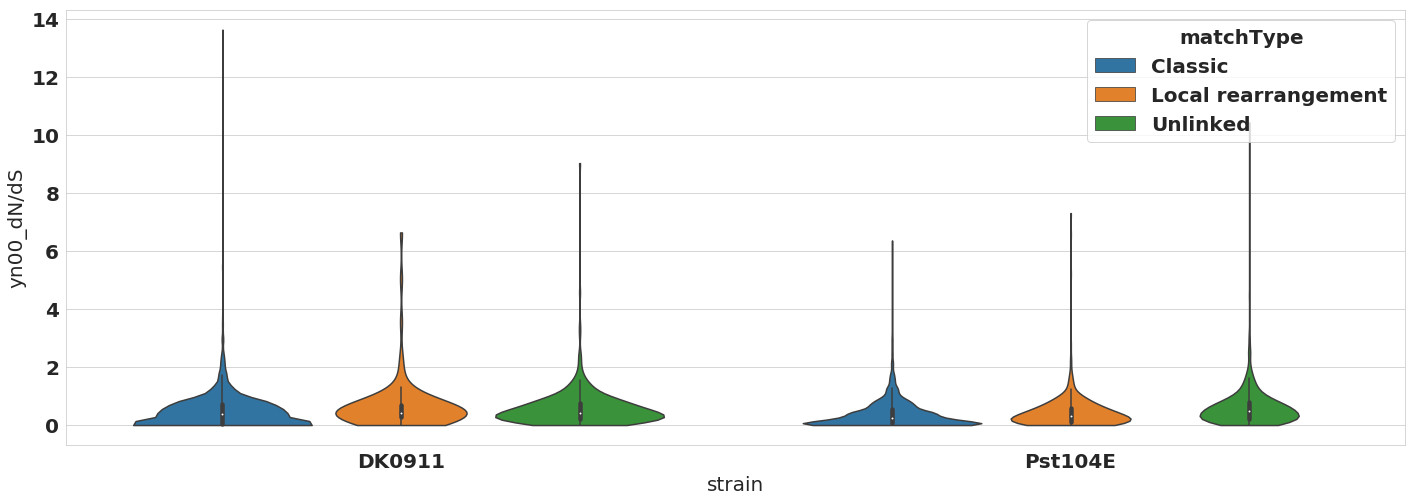

In [118]:
plt.figure(figsize=(24,8))
sns.violinplot(x='strain', y='yn00_dN/dS', data=Merged_df, hue='matchType', \
              hue_order=["Classic", "Local rearrangement", 'Unlinked'] ,cut=0)

/home/benjamin/anaconda3/envs/rainpy/lib/python3.6/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/home/benjamin/anaconda3/envs/rainpy/lib/python3.6/site-packages/matplotlib/tight_layout.py:209: UserWarning: tight_layout cannot make axes height small enough to accommodate all axes decorations
  warnings.warn('tight_layout cannot make axes height small enough '


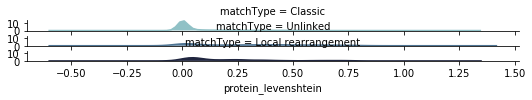

In [41]:
pal = sns.cubehelix_palette(3, rot=-.25, light=.7)
g = sns.FacetGrid(DK0911_alleles_df, row='matchType', hue='matchType', aspect=15, size=.5, palette=pal)
g.map(sns.kdeplot, 'protein_levenshtein', clip_on=True, shade=True, alpha=1, lw=1.5, bw=.2)

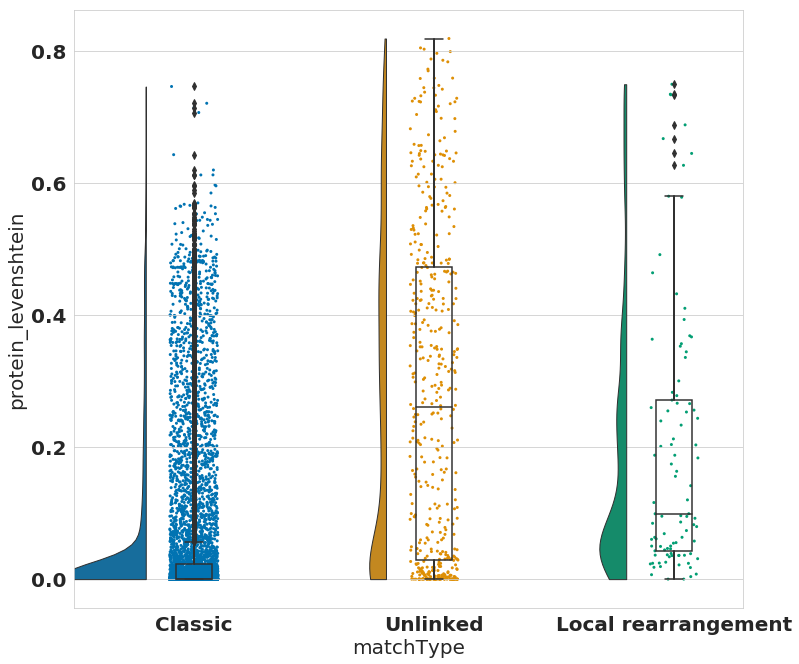

In [119]:
ort='v'
pt.RainCloud(data=DK0911_alleles_df, palette="colorblind", bw=.2,  linewidth=1,cut=0.,\
                   scale="area",orient=ort,x='matchType',y='protein_levenshtein')

In [46]:
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 20}
label_config_x = {'fontsize'            : 'large',
      'verticalalignment'   : 'top',
      'horizontalalignment' : 'center'
      }
label_config_y = {'fontsize'            : 'large',
      'verticalalignment'   : 'bottom',
      'horizontalalignment' : 'center'
      }
matplotlib.rc('font', **font)

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

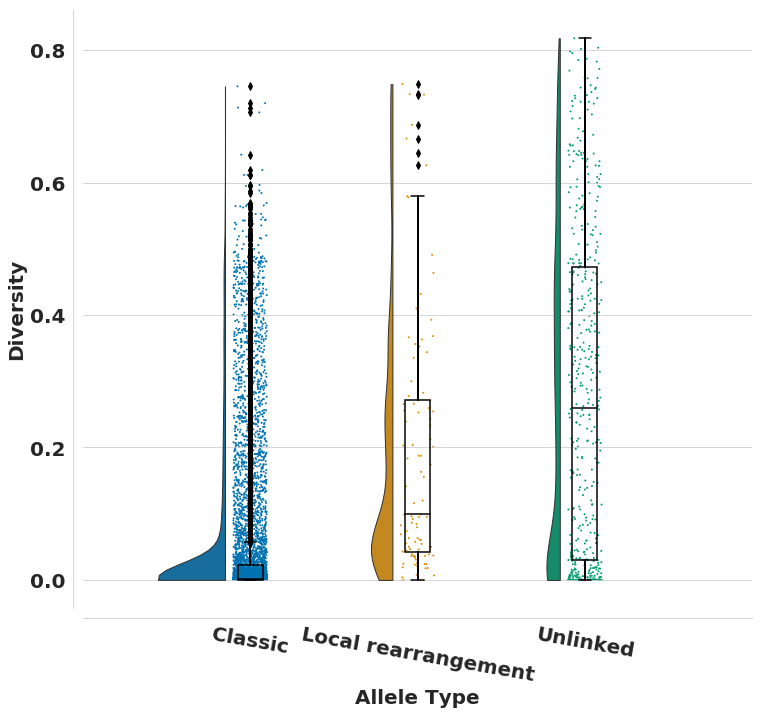

In [120]:
f, ax = plt.subplots(figsize=(12, 11))
sns.set_style("white")
sns.despine(offset=10, trim=False)

order = ["Classic", "Local rearrangement", 'Unlinked']
ax=pt.half_violinplot(data=DK0911_alleles_df, palette="colorblind", bw=.2,  linewidth=1,cut=0.,\
                   scale="area",order=order, width=.8, inner=None,orient=ort,x='matchType',y='protein_levenshtein')


ax=sns.stripplot(data=DK0911_alleles_df, palette="colorblind", edgecolor="white",size=2,orient=ort,\
                 x='matchType',y='protein_levenshtein',order=order,jitter=1,zorder=0)

ax=sns.boxplot(data=DK0911_alleles_df, color="black",orient=ort,width=.15,x='matchType',\
               y='protein_levenshtein',zorder=10,\
              showcaps=True,boxprops={'facecolor':'none', "zorder":10},\
               showfliers=True,whiskerprops={'linewidth':2, "zorder":10},saturation=1,\
              order=order)
lables = ["Classic", "Local rearrangement", 'Unlinked']

ax.xaxis.reset_ticks()
ax.xaxis.set_ticklabels(lables)
ax.set_xlim(left=-1, right=3)
plt.ylabel('Diversity', font)
plt.xlabel('Allele Type', font)
plt.xticks(rotation=-10)


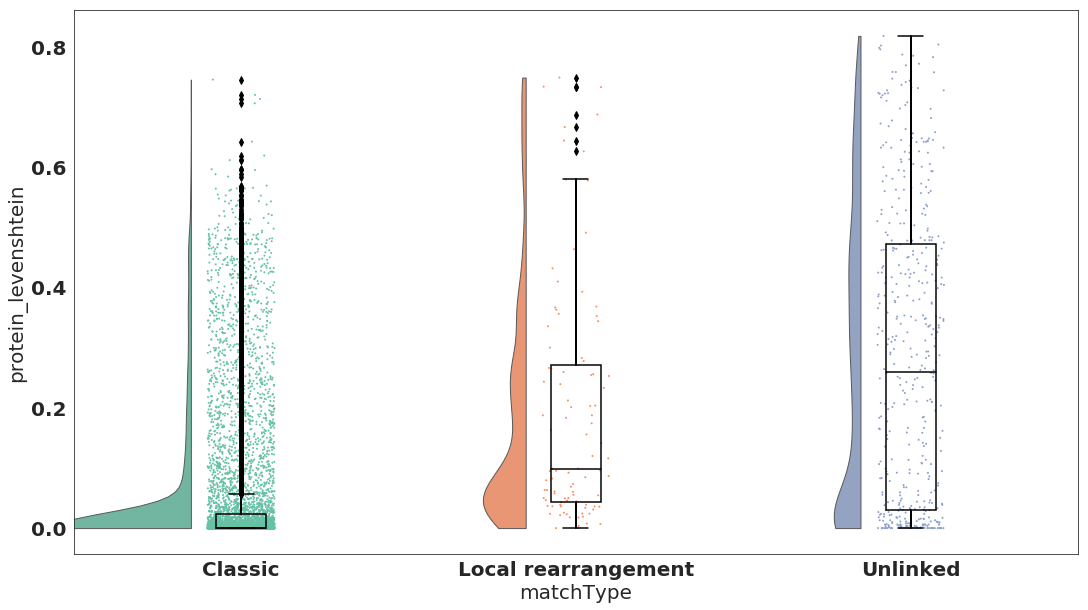

In [121]:
f,ax2 = plt.subplots(1, 1, figsize=(18, 10))
ax2=pt.half_violinplot(data=DK0911_alleles_df, palette="Set2", bw=.2,  linewidth=1,cut=0.,\
                   scale="area",order=order, width=.8, inner=None,orient=ort,x='matchType',y='protein_levenshtein')


ax2=sns.stripplot(data=DK0911_alleles_df, palette="Set2", edgecolor="white",size=2,orient=ort,\
                 x='matchType',y='protein_levenshtein',order=order,jitter=1,zorder=0)

ax2=sns.boxplot(data=DK0911_alleles_df, color="black",orient=ort,width=.15,x='matchType',y='protein_levenshtein',zorder=10,\
              showcaps=True,boxprops={'facecolor':'none', "zorder":10},\
               showfliers=True,whiskerprops={'linewidth':2, "zorder":10},saturation=1,\
              order=order)

(-0.05, 0.84)

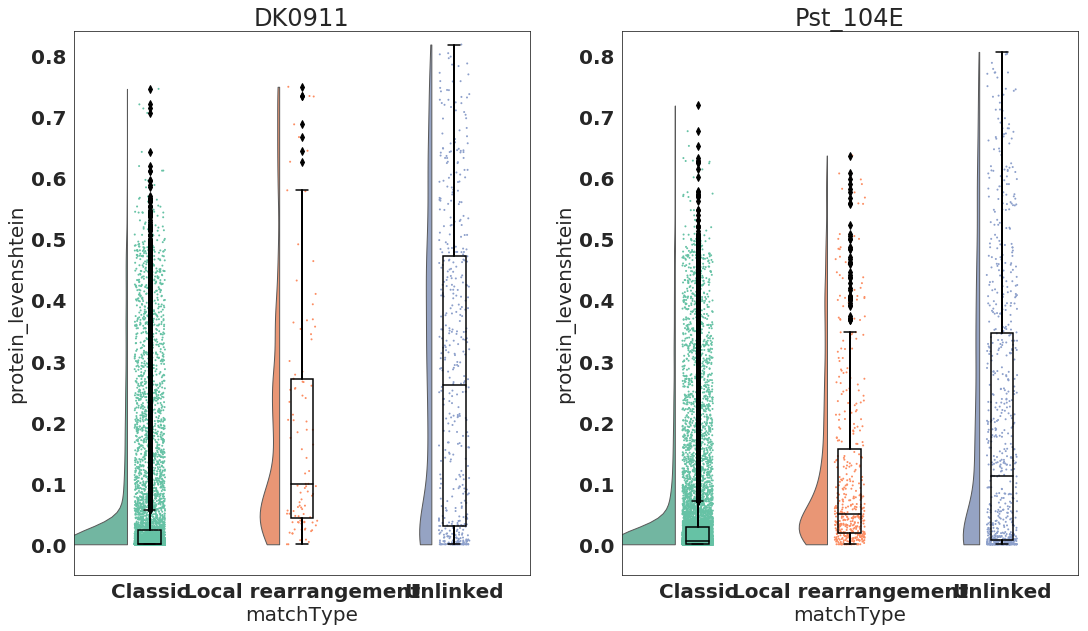

In [49]:
f, (ax1,ax2) = plt.subplots(1, 2, figsize=(18, 10))
ort='v'

order = ['Classic','Local rearrangement','Unlinked']
pt.half_violinplot(data=DK0911_alleles_df, palette="Set2", bw=.2,  linewidth=1,cut=0.,\
                   scale="area",order=order, width=.8, inner=None,orient=ort,x='matchType',\
                     y='protein_levenshtein',ax=ax1)

sns.stripplot(data=DK0911_alleles_df, palette="Set2", edgecolor="white",size=2,orient=ort,\
                 x='matchType',y='protein_levenshtein',order=order,jitter=1,zorder=0, ax=ax1)

sns.boxplot(data=DK0911_alleles_df, color="black",orient=ort,width=.15,x='matchType',y='protein_levenshtein',zorder=10,\
              showcaps=True,boxprops={'facecolor':'none', "zorder":10},\
               showfliers=True,whiskerprops={'linewidth':2, "zorder":10},saturation=1,order=order, ax=ax1)
ax1.set_title('DK0911')
ax1.set_ylim(-0.05,0.84)


pt.half_violinplot(data=Pst_104E_df_alleles_df, palette="Set2", bw=.2,  linewidth=1,cut=0.,\
                   scale="area",order=order, width=.8,ax=ax2, inner=None,orient=ort,x='matchType',y='protein_levenshtein')


sns.stripplot(data=Pst_104E_df_alleles_df, palette="Set2", edgecolor="white",size=2,orient=ort,\
                 x='matchType',y='protein_levenshtein',order=order,jitter=1,zorder=0,ax=ax2)

sns.boxplot(data=Pst_104E_df_alleles_df, color="black",orient=ort,width=.15,x='matchType',y='protein_levenshtein',zorder=10,\
              showcaps=True,boxprops={'facecolor':'none', "zorder":10},\
               showfliers=True,whiskerprops={'linewidth':2, "zorder":10},saturation=1,\
              order=order,ax=ax2)
ax2.set_title('Pst_104E')
ax2.set_ylim(-0.05,0.84)

Text(0.5, 1.0, 'Pst_104E')

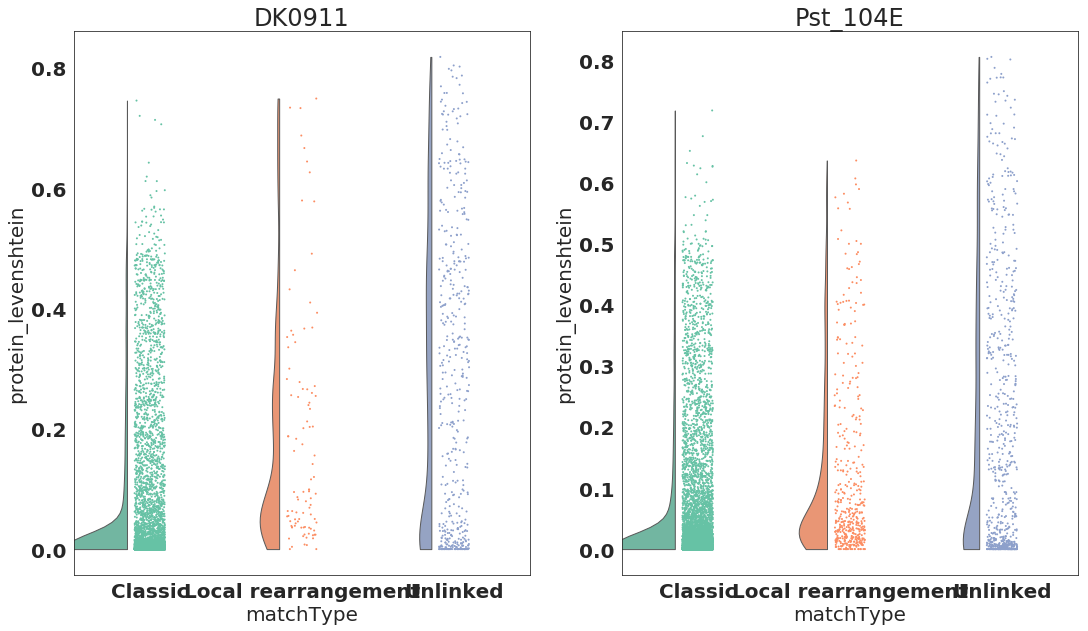

In [50]:
f, (ax1,ax2) = plt.subplots(1, 2, figsize=(18, 10))
ort='v'
order = ['Classic','Local rearrangement','Unlinked']
pt.half_violinplot(data=DK0911_alleles_df, palette="Set2", bw=.2,  linewidth=1,cut=0.,\
                   scale="area",order=order, width=.8, inner=None,orient=ort,x='matchType',\
                     y='protein_levenshtein',ax=ax1)


sns.stripplot(data=DK0911_alleles_df, palette="Set2", edgecolor="white",size=2,orient=ort,\
                 x='matchType',y='protein_levenshtein',order=order,jitter=1,zorder=0, ax=ax1)

#sns.boxplot(data=DK0911_alleles_df, color="black",orient=ort,width=.15,x='matchType',y='protein_levenshtein',zorder=10,\
#              showcaps=True,boxprops={'facecolor':'none', "zorder":10},\
#               showfliers=True,whiskerprops={'linewidth':2, "zorder":10},saturation=1,order=order, ax=ax1)
ax1.set_title('DK0911')

pt.half_violinplot(data=Pst_104E_df_alleles_df, palette="Set2", bw=.2,  linewidth=1,cut=0.,\
                   scale="area",order=order, width=.8,ax=ax2, inner=None,orient=ort,x='matchType',y='protein_levenshtein')


sns.stripplot(data=Pst_104E_df_alleles_df, palette="Set2", edgecolor="white",size=2,orient=ort,\
                 x='matchType',y='protein_levenshtein',order=order,jitter=1,zorder=0,ax=ax2)

#sns.boxplot(data=Pst_104E_df_alleles_df, color="black",orient=ort,width=.15,x='matchType',y='protein_levenshtein',zorder=10,\
#              showcaps=True,boxprops={'facecolor':'none', "zorder":10},\
#               showfliers=True,whiskerprops={'linewidth':2, "zorder":10},saturation=1,\
#              order=order,ax=ax2)
ax2.set_title('Pst_104E')

In [52]:
pallete = [sns.color_palette('colorblind')[x] for x in [0,1]]

In [96]:
number = len(Merged_df[(Merged_df['matchType'] == 'Classic') & (Merged_df['strain'] == 'Pst104E') &(Merged_df['cds_levenshtein'] > 0)])
number2 = len(Merged_df[(Merged_df['matchType'] == 'Classic') & (Merged_df['strain'] == 'DK0911') &(Merged_df['cds_levenshtein'] > 0)])
number3 = len(Merged_df[(Merged_df['matchType'] == 'Local rearrangement') & (Merged_df['strain'] == 'Pst104E') &(Merged_df['cds_levenshtein'] > 0)])
number4 = len(Merged_df[(Merged_df['matchType'] == 'Local rearrangement') & (Merged_df['strain'] == 'DK0911') &(Merged_df['cds_levenshtein'] > 0)])
number5 = len(Merged_df[(Merged_df['matchType'] == 'Unlinked') & (Merged_df['strain'] == 'Pst104E') &(Merged_df['cds_levenshtein'] > 0)])
number6 = len(Merged_df[(Merged_df['matchType'] == 'Unlinked') & (Merged_df['strain'] == 'DK0911') &(Merged_df['cds_levenshtein'] > 0)])

Text(0.82, 2.05, 'n= 434')

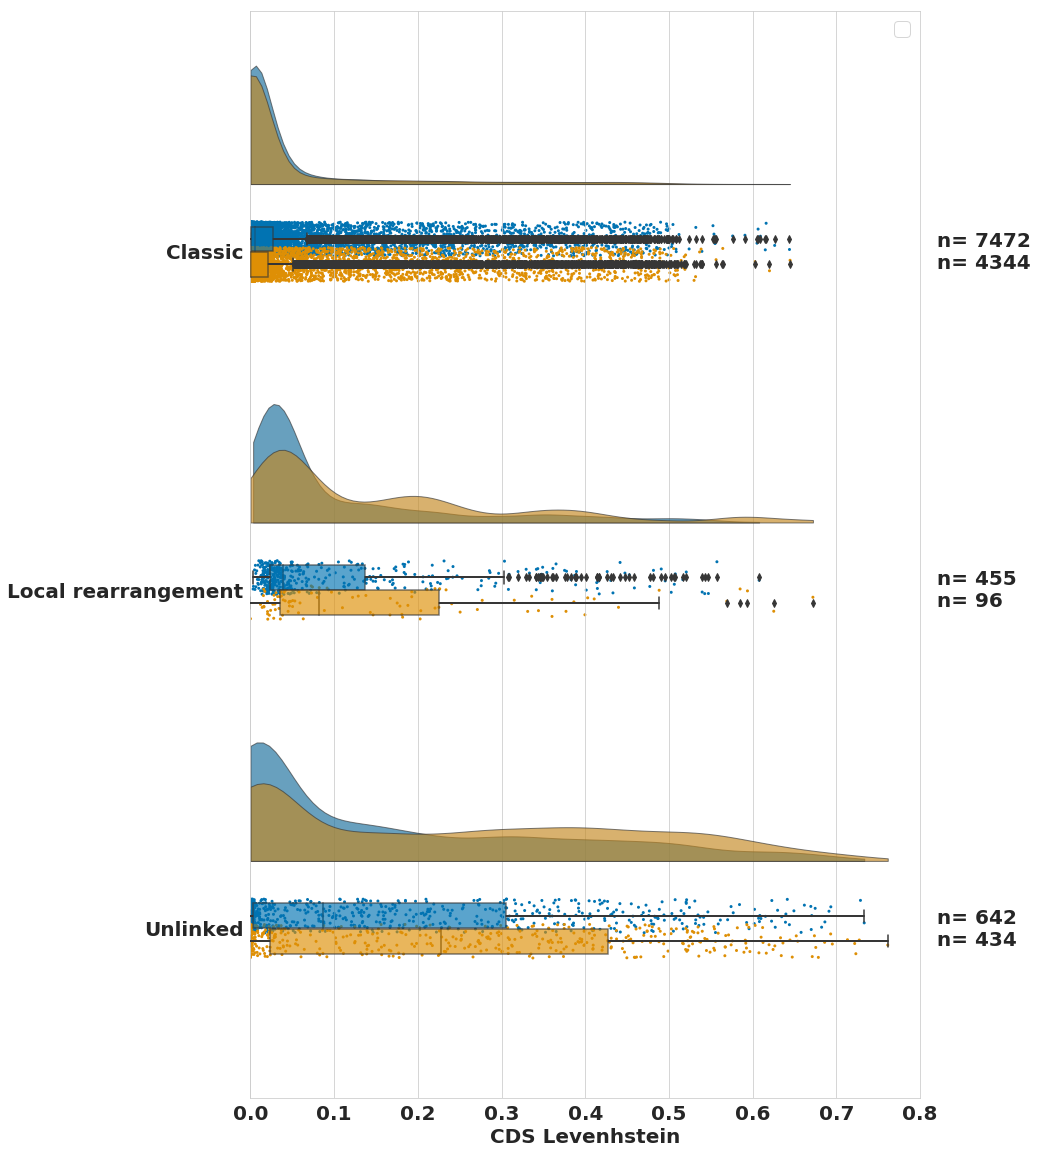

In [98]:
f, ax = plt.subplots(1, 1, figsize=(12,20))

dx='matchType'; dy='cds_levenshtein'; dhue = "strain"; ort="h"; sigma = .2
order = ['Classic alleles','Alleles with local rearrangement','Unlinked alleles',]
pt.RainCloud(x = dx, y = dy, hue = dhue, data = Merged_df.sort_values(['strain', dx], ascending=[False, True]), palette = pallete, bw = sigma,
                 width_viol = .7, figsize = (12,20), orient = ort, alpha = .65, dodge = True, ax=ax)
sns.set_style("whitegrid")
#plt.yticks([])
plt.legend('')
plt.xlim(0, 0.8)
plt.ylabel('')
plt.xlabel('CDS Levenhstein',fontdict = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 20})



number = len(Merged_df[(Merged_df['matchType'] == 'Classic') & (Merged_df['strain'] == 'Pst104E') &(Merged_df[dy] > 0)])
number2 = len(Merged_df[(Merged_df['matchType'] == 'Classic') & (Merged_df['strain'] == 'DK0911') &(Merged_df['cds_levenshtein'] > 0)])
number3 = len(Merged_df[(Merged_df['matchType'] == 'Local rearrangement') & (Merged_df['strain'] == 'Pst104E') &(Merged_df[dy] > 0)])
number4 = len(Merged_df[(Merged_df['matchType'] == 'Local rearrangement') & (Merged_df['strain'] == 'DK0911') &(Merged_df[dy] > 0)])
number5 = len(Merged_df[(Merged_df['matchType'] == 'Unlinked') & (Merged_df['strain'] == 'Pst104E') &(Merged_df[dy] > 0)])
number6 = len(Merged_df[(Merged_df['matchType'] == 'Unlinked') & (Merged_df['strain'] == 'DK0911') &(Merged_df[dy] > 0)])


plt.text(0.82, -0.015, 'n= %i' % number)
plt.text(0.82, 0.05, 'n= %i' % number2)


plt.text(0.82, 1-0.015, 'n= %i' % number3)
plt.text(0.82, 1+0.05, 'n= %i' % number4)


plt.text(0.82, 2-0.015, 'n= %i' % number5)
plt.text(0.82, 2+0.05, 'n= %i' % number6)

Text(0.92, 2.05, 'n= 430')

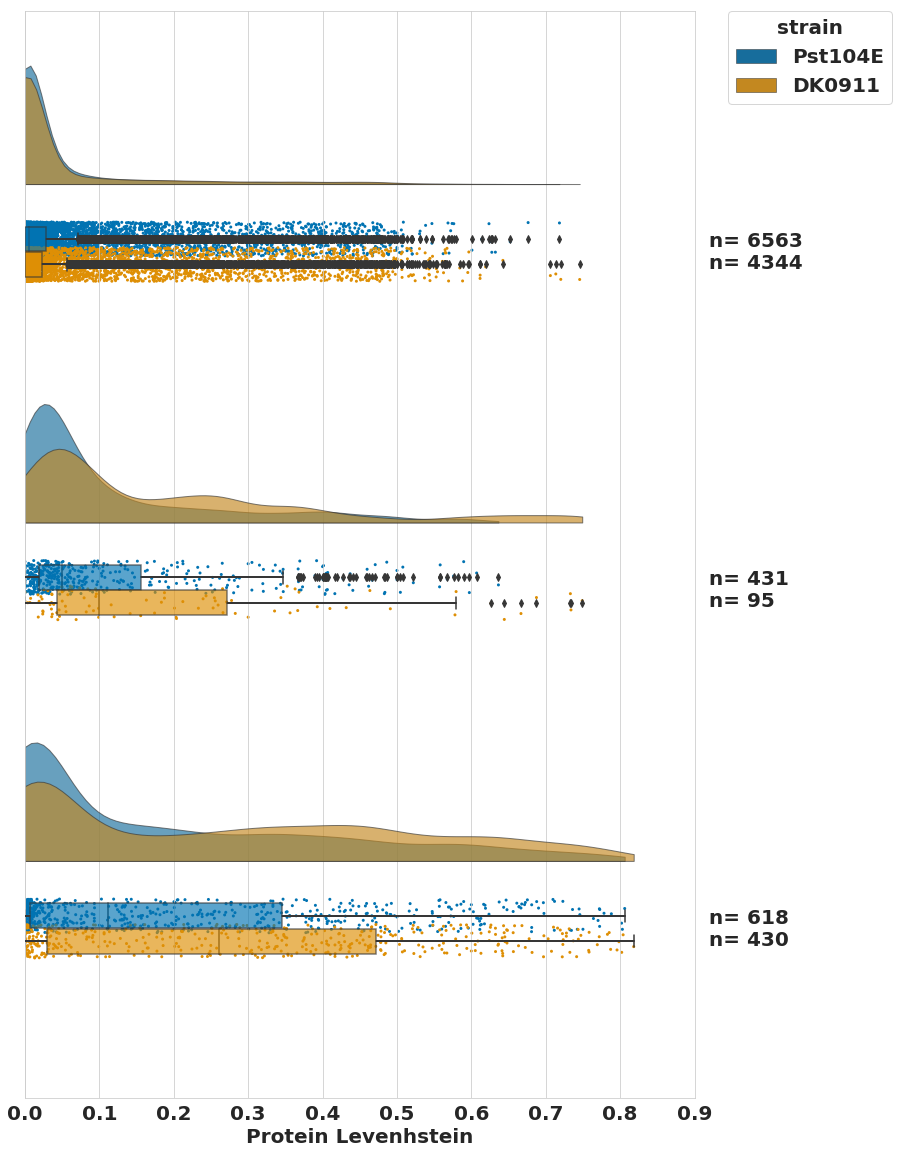

In [100]:
f, ax = plt.subplots(1, 1, figsize=(12,20))

dx='matchType'; dy='protein_levenshtein'; dhue = "strain"; ort="h"; sigma = .2
pt.RainCloud(x = dx, y = dy, hue = dhue, data = Merged_df.sort_values(['strain', dx], ascending=[False, True]), palette = pallete, bw = sigma,
                 width_viol = .7, figsize = (12,20), orient = ort, alpha = .65, dodge = True, ax=ax)
sns.set_style("whitegrid")
plt.yticks([])
#plt.legend('')
plt.xlim(0, 0.9)
plt.ylabel('')
plt.xlabel('Protein Levenhstein',fontdict = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 20})

number = len(Merged_df[(Merged_df['matchType'] == 'Classic') & (Merged_df['strain'] == 'Pst104E') &(Merged_df[dy] > 0)])
number2 = len(Merged_df[(Merged_df['matchType'] == 'Classic') & (Merged_df['strain'] == 'DK0911') &(Merged_df['cds_levenshtein'] > 0)])
number3 = len(Merged_df[(Merged_df['matchType'] == 'Local rearrangement') & (Merged_df['strain'] == 'Pst104E') &(Merged_df[dy] > 0)])
number4 = len(Merged_df[(Merged_df['matchType'] == 'Local rearrangement') & (Merged_df['strain'] == 'DK0911') &(Merged_df[dy] > 0)])
number5 = len(Merged_df[(Merged_df['matchType'] == 'Unlinked') & (Merged_df['strain'] == 'Pst104E') &(Merged_df[dy] > 0)])
number6 = len(Merged_df[(Merged_df['matchType'] == 'Unlinked') & (Merged_df['strain'] == 'DK0911') &(Merged_df[dy] > 0)])


plt.text(0.92, -0.015, 'n= %i' % number)
plt.text(0.92, 0.05, 'n= %i' % number2)


plt.text(0.92, 1-0.015, 'n= %i' % number3)
plt.text(0.92, 1+0.05, 'n= %i' % number4)


plt.text(0.92, 2-0.015, 'n= %i' % number5)
plt.text(0.92, 2+0.05, 'n= %i' % number6)

Text(14.05, 2.05, 'n= 375')

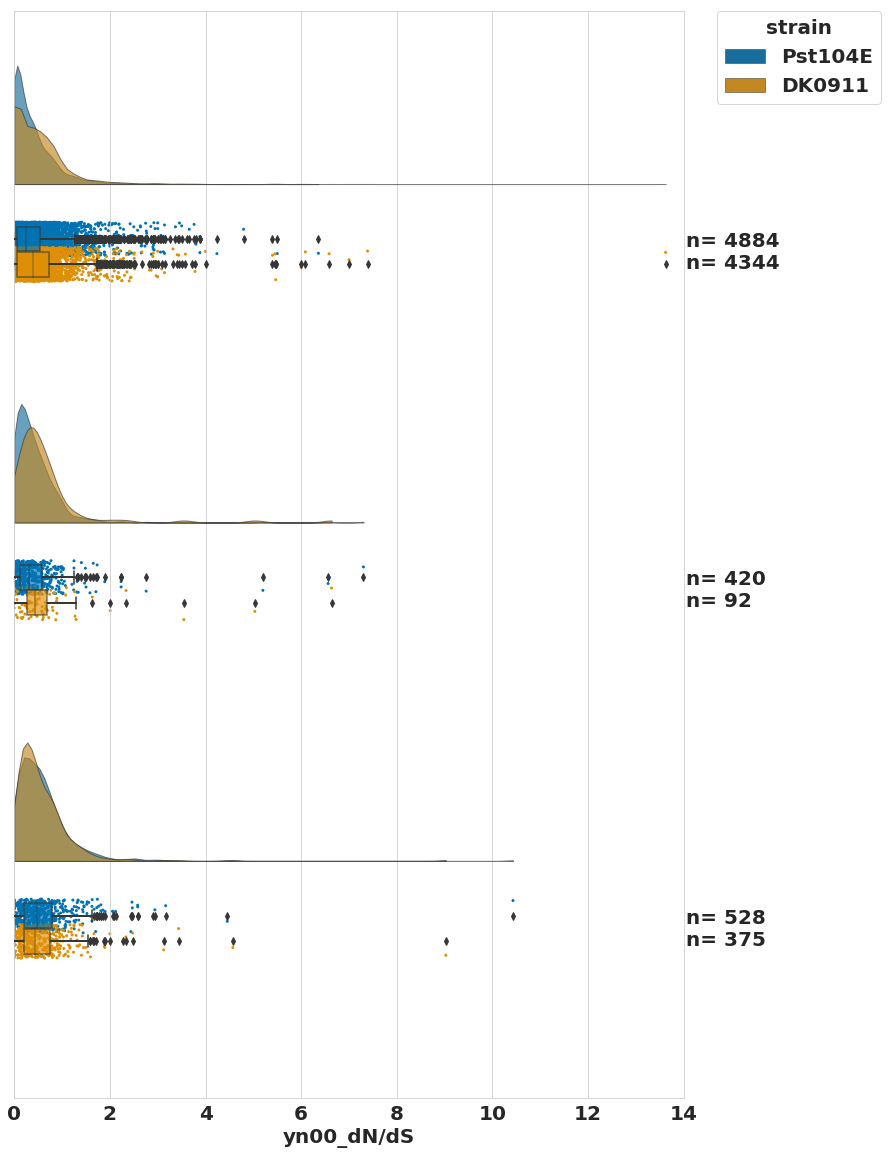

In [131]:
f, ax = plt.subplots(1, 1, figsize=(12,20))
dx='matchType'; dy='yn00_dN/dS'; dhue = "strain"; ort="h"; pal = pallete; sigma = .2
pt.RainCloud(x = dx, y = dy, hue = dhue, data = Merged_df.sort_values(['strain', dx], ascending=[False, True]), palette = pallete, bw = sigma,
                 width_viol = .7, figsize = (12,20), orient = ort, alpha = .65, dodge = True, ax=ax)
sns.set_style("whitegrid")
plt.yticks([])
#plt.legend('')
plt.xlim(0, 14)
plt.ylabel('')
plt.xlabel('yn00_dN/dS',fontdict = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 20})

number = len(Merged_df[(Merged_df['matchType'] == 'Classic') & (Merged_df['strain'] == 'Pst104E') &(Merged_df[dy] > 0)])
number2 = len(Merged_df[(Merged_df['matchType'] == 'Classic') & (Merged_df['strain'] == 'DK0911') &(Merged_df['cds_levenshtein'] > 0)])
number3 = len(Merged_df[(Merged_df['matchType'] == 'Local rearrangement') & (Merged_df['strain'] == 'Pst104E') &(Merged_df[dy] > 0)])
number4 = len(Merged_df[(Merged_df['matchType'] == 'Local rearrangement') & (Merged_df['strain'] == 'DK0911') &(Merged_df[dy] > 0)])
number5 = len(Merged_df[(Merged_df['matchType'] == 'Unlinked') & (Merged_df['strain'] == 'Pst104E') &(Merged_df[dy] > 0)])
number6 = len(Merged_df[(Merged_df['matchType'] == 'Unlinked') & (Merged_df['strain'] == 'DK0911') &(Merged_df[dy] > 0)])


plt.text(14.05, -0.015, 'n= %i' % number)
plt.text(14.05, 0.05, 'n= %i' % number2)


plt.text(14.05, 1-0.015, 'n= %i' % number3)
plt.text(14.05, 1+0.05, 'n= %i' % number4)


plt.text(14.05, 2-0.015, 'n= %i' % number5)
plt.text(14.05, 2+0.05, 'n= %i' % number6)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

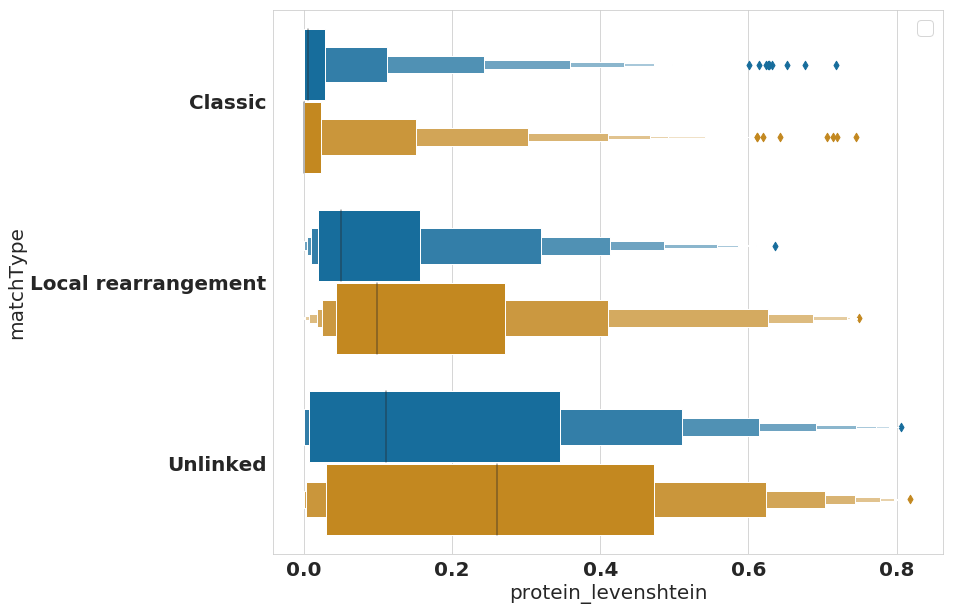

In [143]:
f, ax = plt.subplots(1, 1, figsize=(12,10))
dx='matchType'; dy='protein_levenshtein'; dhue = "strain"; ort="h"; sigma = .2
sns.boxenplot(x = dy, y = dx, hue = dhue, data = Merged_df.sort_values(['strain', dy], ascending=[False, True]), orient = 'h', order = order, palette=pallete)
plt.legend('')

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

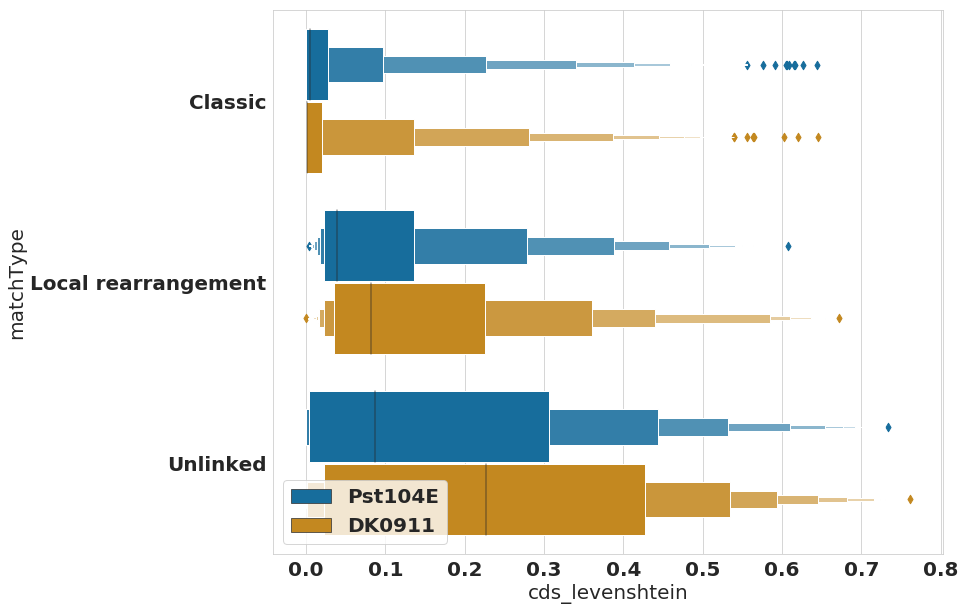

In [146]:
f, ax = plt.subplots(1, 1, figsize=(12,10))
dx='matchType'; dy='cds_levenshtein'; dhue = "strain"; ort="h"; sigma = .2
sns.boxenplot(x = dy, y = dx, hue = dhue, data = Merged_df.sort_values(['strain', dy], ascending=[False, True]), orient = 'h', order = order, palette=pallete)
plt.legend()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

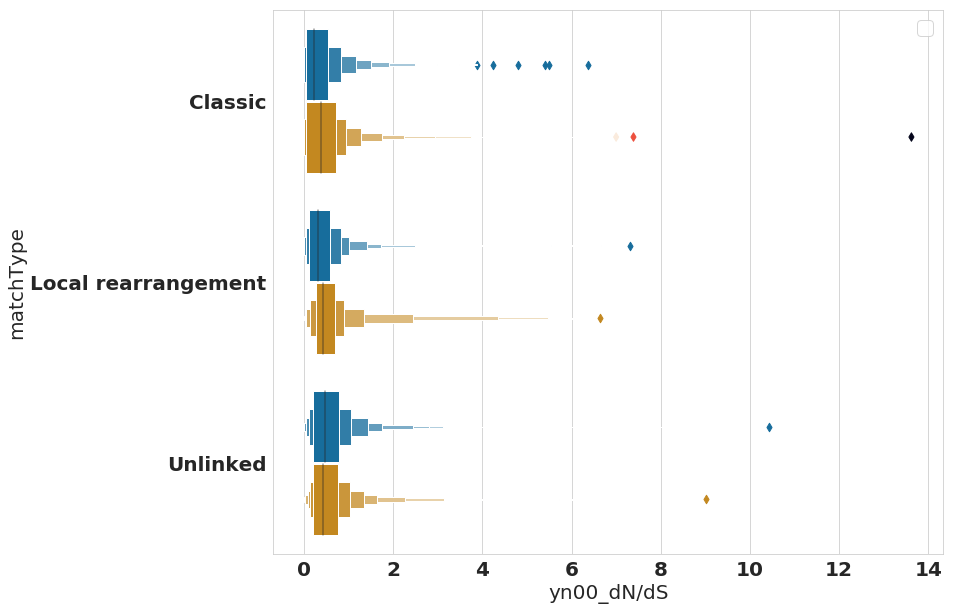

In [145]:
f, ax = plt.subplots(1, 1, figsize=(12,10))
dx='matchType'; dy='yn00_dN/dS'; dhue = "strain"; ort="h"; pal = pallete; sigma = .2
sns.boxenplot(x = dy, y = dx, hue = dhue, data = Merged_df.sort_values(['strain', dy], ascending=[False, True]), orient = 'h', order = order, palette=pallete)
plt.legend('')